# Exploratory Data Analysis
## Q1  How many samples and features does each file have?
### Using pandas for readings and finding the dimensions of the dataset

In [8]:
import pandas as pd 
import numpy as np
#reading the dataset
df = pd.read_csv('./../data/listings.csv')

print('There are', df.shape[0], 'samples and',df.shape[1],'features in this dataset.' )


There are 9467 samples and 74 features in this dataset.


## Q2 What are the types of features?

In [5]:
print("Classic representation of types: \n", df.dtypes)
print("\nAn extended approach: \n", df.applymap(type))

Classic representation of types: 
 id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

An extended approach: 
                  id    listing_url      scrape_id   last_scraped  \
0     <class 'int'>  <class 'str'>  <class 'int'>  <class 'str'>   
1     <class 'int'>  <class 'str'>  <class 'int'>  <class 'str'>   
2     <class 'int'>  <class 'str'>  <class 'int'>  <class 'str'>   
3     <class 'int'>  <clas

## Q3 Are there any missing values? If yes, how many and how many rows are affected?

In [9]:
print('Missing  values in dataset:',df.isnull().sum().sum())
print('Rows affected:',sum(df.apply(lambda x: sum(x.isnull().values), axis = 1)>0))
c = np.round(df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100, 1)
print(c,'% of the dataset is affected')

Missing  values in dataset: 73754
Rows affected: 9467
10.5 % of the dataset is affected


## Q4 How many listings per neighbourhood are there?

neighbourhood_cleansed
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1738
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  815
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             729
ΝΕΟΣ ΚΟΣΜΟΣ                          689
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     580
ΠΑΓΚΡΑΤΙ                             406
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      404
ΚΟΛΩΝΑΚΙ                             333
ΑΚΡΟΠΟΛΗ                             305
ΑΜΠΕΛΟΚΗΠΟΙ                          302
ΘΗΣΕΙΟ                               282
ΚΥΨΕΛΗ                               263
ΚΕΡΑΜΕΙΚΟΣ                           248
ΠΕΤΡΑΛΩΝΑ                            221
ΣΤΑΔΙΟ                               182
ΙΛΙΣΙΑ                               166
ΓΟΥΔΙ                                148
ΖΑΠΠΕΙΟ                              146
ΛΥΚΑΒΗΤΤΟΣ                           125
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     119
ΠΑΤΗΣΙΑ                              117
ΓΚΥΖΗ                                 95
ΝΙΡΒΑΝΑ                               91
ΓΚΑΖΙ                             

Text(0, 0.5, 'Listings')

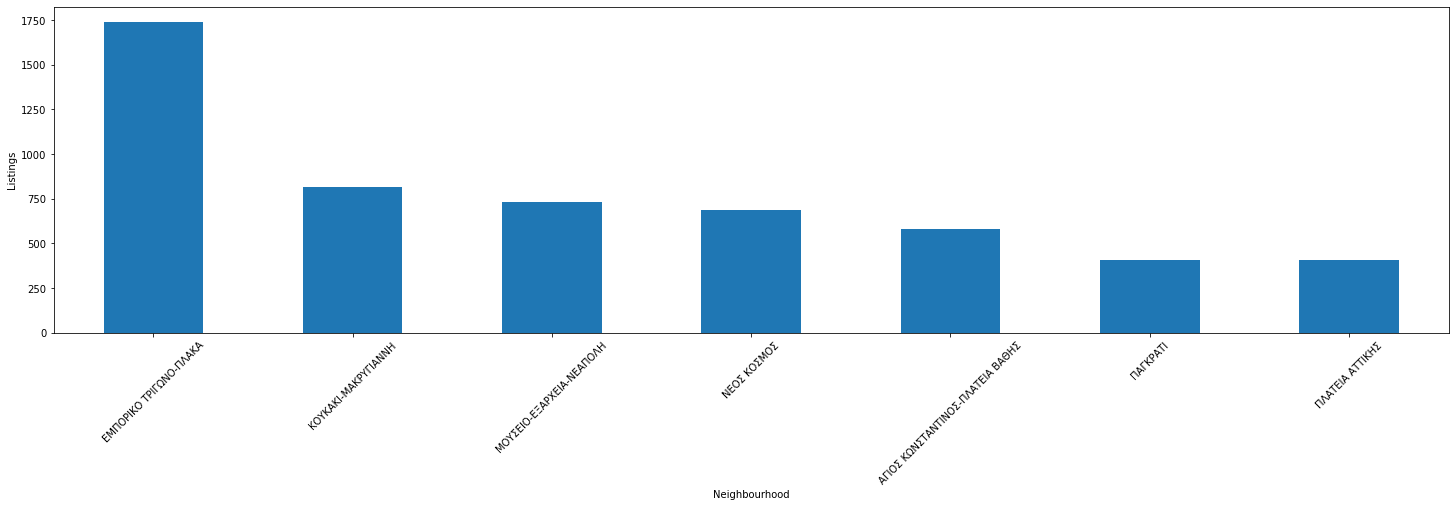

In [12]:
import matplotlib.pyplot as plt
neighbourhood_cleansed = df.groupby("neighbourhood_cleansed")["neighbourhood_cleansed"].count().sort_values(ascending = False)
print(neighbourhood_cleansed)
plt.figure(figsize=(25,6))
neighbourhood_cleansed[neighbourhood_cleansed>400].plot.bar(rot = 45)
plt.xlabel('Neighbourhood')
plt.ylabel('Listings')

## Q5  How many listings per room type are there?

Entire home/apt    8283
Private room        953
Hotel room          158
Shared room          73
Name: room_type, dtype: int64


Text(0, 0.5, 'Listings')

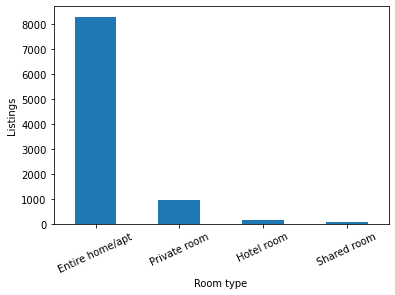

In [13]:
room_type = df['room_type'].value_counts()
print(room_type)
room_type.plot.bar(rot = 25)
plt.xlabel('Room type')
plt.ylabel('Listings')

## Q6 How many listings per room number are there?

#rooms #listings
 1.0     5358
2.0     2590
3.0      551
4.0      135
5.0       32
6.0       27
10.0       3
7.0        2
9.0        1
8.0        1
33.0       1
Name: bedrooms, dtype: int64


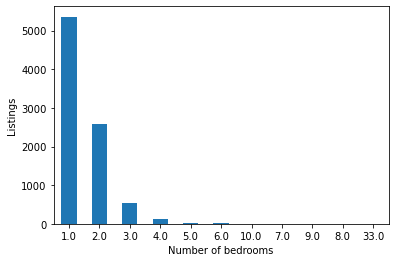

In [14]:
bedrooms = df['bedrooms'].value_counts()
print("#rooms #listings\n",bedrooms)
bedrooms.plot.bar(rot = 0)
plt.xlabel('Number of bedrooms')
plt.ylabel('Listings')
plt.show()

## Q7 What is the distribution of listings per host? What are the most listings that a single host has?

Top 10 host with the most listings:
77457889     126
29927830     113
748818        67
112527018     63
135482892     60
2089542       56
1621474       56
20104194      50
1418201       42
7186279       40
Name: host_id, dtype: int64
Host 77457889 has the most listings ( 126 )


Text(0, 0.5, 'Number of hosts')

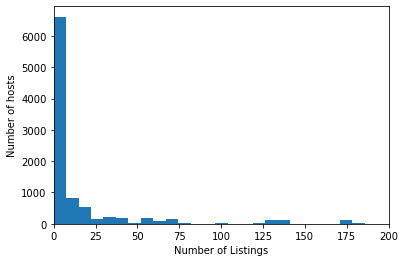

In [16]:
id = df['host_id'].value_counts().head(10)
print('Top 10 host with the most listings:')
print(id.sort_values(ascending=False))
c = id.sort_values(ascending=False)
print
print('Host',c.index[0],'has the most listings','(',c.values[0],')')


## Distribution
 
df['host_listings_count'].plot.hist(bins = int(180/1))
plt.xlim(0,200)
plt.xlabel('Number of Listings')
plt.ylabel('Number of hosts')

## Q8 When was the first host registered?

In [17]:
df['host_since'] = pd.to_datetime(df['host_since'])
d = df['host_since'].min()
print('First host registration date: ',d.date())

First host registration date:  2009-09-08


##  Q9  What year had the most hosts registered?

The year with most hosts registrations:  2018.0


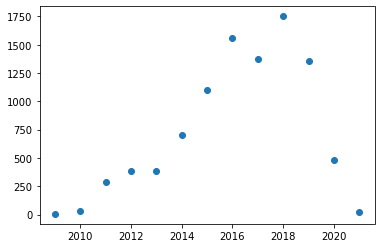

In [23]:
df['year'] = pd.DatetimeIndex(df['host_since']).year #Extracting just Year from registration dates
year = df['year'].value_counts().index.tolist() # n , for n = 1 we get the most frequent year of registrations
print('The year with most hosts registrations: ', year[0])
## plot 
host_since = pd.to_datetime(df['host_since'])
host_registered_years = host_since.dt.year
registers_per_year = host_registered_years.value_counts()
plt.scatter(registers_per_year.index, registers_per_year.values)

## Q10  What is the distribution of score ratings? Are there lots of reviews scoring < 50?

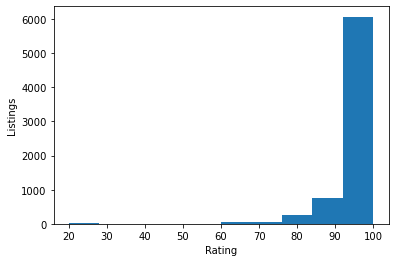

Number of reviews < 50: 30


In [26]:
df['review_scores_rating'].hist(grid = False)
plt.xlabel('Rating')
plt.ylabel('Listings')
plt.show()
print('Number of reviews < 50:', sum(df['review_scores_rating'] < 50))

## Q11 How many identified hosts are there? What is their percentage over all hosts?

In [28]:
verified_hosts = df['host_identity_verified'].value_counts()
percentage = (verified_hosts[0]/(verified_hosts[0]+verified_hosts[1]))*100
percentage = round(percentage, 0)
print(f'{percentage}% of the hosts are verified ({verified_hosts[0]} hosts)') 

67.0% of the hosts are verified (6303 hosts)


## Q12 What are the top-20 most common amenities provided by the hosts?

In [38]:
amenities_list = list(df.amenities) 
amenities_list_string = " ".join(amenities_list) # group amenities in a string
amenities_list_string = amenities_list_string.replace('] [', ', ') # removing characters like []
amenities_list_string = amenities_list_string.replace('"', '') # make it more clean, removing "
x = amenities_list_string.split(", ") 
from collections import Counter
c = Counter(x)
c.most_common(20)



[('Wifi', 9031),
 ('Essentials', 8987),
 ('Air conditioning', 8862),
 ('Hair dryer', 8593),
 ('Long term stays allowed', 8570),
 ('Hangers', 8521),
 ('Kitchen', 8508),
 ('TV', 8169),
 ('Shampoo', 8077),
 ('Iron', 8038),
 ('Heating', 7830),
 ('Hot water', 7027),
 ('Dedicated workspace', 6708),
 ('Refrigerator', 6441),
 ('Dishes and silverware', 6369),
 ('Cooking basics', 6167),
 ('Washer', 6090),
 ('Coffee maker', 5927),
 ('Elevator', 5383),
 ('Bed linens', 5347)]

## Q13 Can you identify the top-10 rated listings? Are they by the same host?

In [43]:
ratings = df[['review_scores_rating', 'number_of_reviews','review_scores_accuracy','id']]
ratings = ratings.sort_values(['review_scores_rating', 'number_of_reviews','review_scores_accuracy','id'], ascending=[False, False, False, False])
print('Top-10 lisitngs are from different hosts')
ratings.head(10)

Top-10 lisitngs are from different hosts


,review_scores_rating,number_of_reviews,review_scores_accuracy,id
41,100.0,439,10.0,306234
1389,100.0,385,10.0,15841192
462,100.0,285,10.0,6406712
827,100.0,282,10.0,11614090
131,100.0,263,10.0,1208210
336,100.0,244,10.0,4414146
78,100.0,240,10.0,644785
1413,100.0,236,NaN,16037846
2148,100.0,227,10.0,19901354
1257,100.0,220,10.0,14605769


## Q14 Can you identify the top-5 rated locations/neighbourhoods?

In [44]:
locations_ratings_mean = df.groupby('neighbourhood_cleansed')['review_scores_location'].mean()
locations_ratings_mean = locations_ratings_mean.sort_values(ascending = False)
print(locations_ratings_mean[0:5])

neighbourhood_cleansed
ΚΟΛΩΝΑΚΙ               9.932075
ΡΗΓΙΛΛΗΣ               9.900000
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ    9.882609
ΘΗΣΕΙΟ                 9.869369
ΖΑΠΠΕΙΟ                9.866071
Name: review_scores_location, dtype: float64


## Q15 What is the distribution of price for each room type?

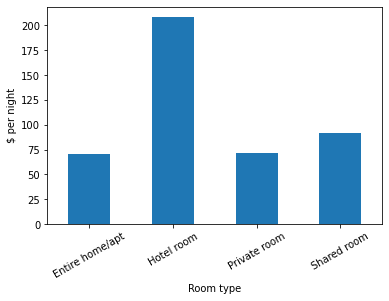

In [47]:
import numpy as np
price_room_type = pd.DataFrame(data = np.vstack((df['room_type'], df['price'])).T, 
                                columns=['room_type', 'price']).replace({'\$':''}, regex = True)

price_room_type = price_room_type.replace({'\,':''}, regex = True)
price_room_type['price'] = price_room_type['price'].astype(float)
room_type_price_mean = price_room_type.groupby('room_type')['price'].mean()
room_type_price_mean.plot.bar(rot = 30)
plt.ylabel('$ per night')
plt.xlabel('Room type')
plt.show()